In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#train['Obs']=range(1,805)  # maybe change index from 1 to 804
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,20,RL,NaN,7000,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,GdWo,NaN,0,7,2009,WD,136500
1,20,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,Shed,900,6,2009,WD,120000
2,60,RL,75.0,9675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2009,WD,253000
3,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2008,WD,170000
4,75,RM,65.0,8850,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,7,2006,ConLw,144000


In [153]:
rows, columns = train.shape
print(rows)
print(columns)

804
79


In [154]:
train.describe().round(2) # without object type

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,804.00,647.00,804.00,804.00,804.00,804.00,804.00,800.00,804.00,804.00,...,804.00,804.00,804.00,804.00,804.00,804.00,804.00,804.00,804.00,804.00
mean,57.30,68.36,10016.71,5.99,5.65,1969.80,1983.02,100.63,434.91,57.37,...,95.31,43.73,23.76,3.03,16.30,1.35,24.29,6.00,2007.90,175324.47
std,42.49,22.04,7721.43,1.31,1.08,28.52,20.60,179.79,415.95,187.09,...,129.46,61.36,62.51,27.96,54.42,24.61,212.26,2.61,1.32,70035.49
min,20.00,21.00,1300.00,2.00,3.00,1879.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,35000.00
25%,20.00,57.00,7513.50,5.00,5.00,1953.00,1964.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00,129500.00
50%,50.00,70.00,9469.50,6.00,5.00,1971.00,1991.00,0.00,388.50,0.00,...,0.00,21.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,158725.00
75%,70.00,80.00,11438.00,7.00,6.00,1997.25,2002.00,150.75,697.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,7.00,2009.00,206225.00
max,190.00,155.00,164660.00,10.00,9.00,2009.00,2010.00,1224.00,2257.00,1526.00,...,690.00,365.00,368.00,508.00,291.00,576.00,4500.00,12.00,2010.00,615000.00


In [155]:
# variable preparation

predictors=list(train.columns[2:-1])
continuous_predictors=train.select_dtypes(['int64']).columns
columns_categorical=train.select_dtypes(['object']).columns


In [156]:
# detailed discussion are in EDA below.
correlation=train.corr()

# Task 1: Data preparation 

In [157]:
price=train.loc[:,'SalePrice']
train.dtypes.head(20)   # include integer, float and object.

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemod/Add      int64
dtype: object

## Step 1: Categorial variables clean and discussion

In [158]:
train['MSZoning'].unique()

array(['RL', 'FV', 'RM', 'RH', 'C (all)', 'I (all)'], dtype=object)

In [159]:
# these variables are part of 'columns_categorical', 
categorical=['MSZoning', 'Street','LotShape', 'LandContour','Utilities','LotConfig', 'LandSlope'
           , 'Neighborhood', 'Condition1', 'Condition2' ,'BldgType','HouseStyle', 'RoofStyle', 'RoofMatl', 
             'Exterior1st','Exterior2nd','ExterQual', 'ExterCond', 'Foundation','Heating'
            , 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional'
            , 'PavedDrive','SaleType']


train['MSZoning']=train['MSZoning'].str.replace('(',"")
train['MSZoning']=train['MSZoning'].str.replace(')',"")
for item1 in categorical:
    train[item1]=train[item1].str.replace(' ',"")
    length=len(train[item1].unique())
    count=0
    while (length-1)>=count:
        for item2 in train[item1].unique():
            count1=str(count)
            train[item1]=train[item1].str.replace(item2,count1)
            count=int(count1)+1

In [160]:
## zoe:
# 804 observations, so other 3 classes might be removed. (9/804<1%) 
# but may be resampling method could strength MSZoning=3. 
# delate observation could increase bias, 

In [161]:
#This is to replace NaN with empty string for now
train = train.replace(np.nan, '', regex=True)

#Use this to replace whatever first argument is with second argument
#train['Alley'] = train['Alley'].replace(0,'' , regex=True)


## Other categorial variables 

## 1 ) MSSubclass (type of dwelling)
### corr is only 0.06

In [162]:
# zoe : for this predictor, i think it should be trade as categorial variable, although its data type is integer.
print(train['MSSubClass'].unique())

count1=train.groupby("MSSubClass").count()
print(count1.loc[:,'SalePrice'])

[ 20  60 160  75  50  30  90 180 190 120  70  80  85  40  45 150]
MSSubClass
20     295
30      40
40       2
45       4
50      84
60     149
70      37
75       6
80      31
85      18
90      31
120     47
150      1
160     40
180      7
190     12
Name: SalePrice, dtype: int64


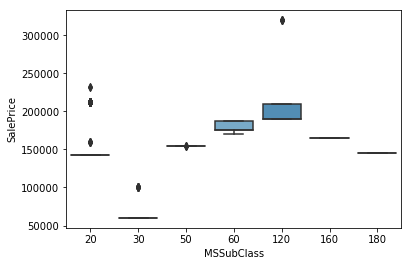

In [163]:
rows=train['MSSubClass'] # too few observations for 150， 40，45 ， so should we remove them? 
sns.boxplot(x=train.loc[rows,'MSSubClass'], y=train.loc[rows,'SalePrice'], palette='Blues')
plt.show()
# nonlinear relationship, so itis better to treat it as categorial variable.
# apparent outliers.... 

## 2) OverallQual

In [164]:
print(train['OverallQual'].unique())

count1=train.groupby("OverallQual").count()
print(count1.loc[:,'SalePrice'])

[ 5  7  6  8  4  9  3  2 10]
OverallQual
2       4
3      11
4      58
5     246
6     221
7     147
8      96
9      18
10      3
Name: SalePrice, dtype: int64


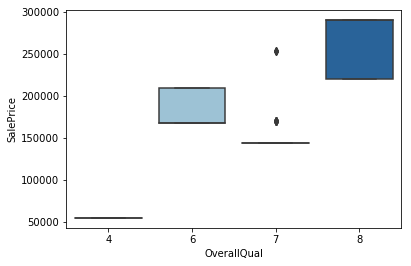

In [165]:
rows=train['OverallQual'] # this plot has problem , donot show all classes
sns.boxplot(x=train.loc[rows,'OverallQual'], y=train.loc[rows,'SalePrice'], palette='Blues')
plt.show()

## 3) OverallCond

In [166]:
print(train['OverallCond'].unique())

count1=train.groupby("OverallCond").count()
print(count1.loc[:,'SalePrice'])

[8 5 6 7 4 3 9]
OverallCond
3     15
4     27
5    420
6    172
7    113
8     49
9      8
Name: SalePrice, dtype: int64


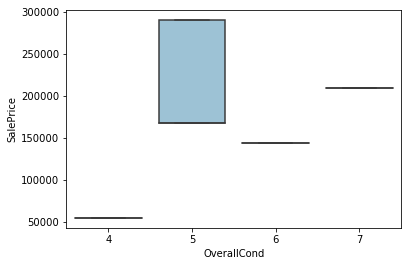

In [167]:
rows=train['OverallCond'] # this plot has problem as well
sns.boxplot(x=train.loc[rows,'OverallCond'], y=train.loc[rows,'SalePrice'], palette='Blues')
plt.show()

# Task 2: EDA

## Part 1: Individual variables analysis 
## Response :Houseprice

### as we need build several model to compare, for ols, data transformation should be considered.

In [168]:
#data transsformation
from scipy import stats
y, lmbda=stats.boxcox(train['SalePrice'])
train['BoxCoxPrice']=((train['SalePrice']**lmbda - 1) / lmbda)
train['LogPrice']=np.log(train['SalePrice'])
prices=['SalePrice','LogPrice','BoxCoxPrice']
#print(lmbda)
print(len(train))
print(lmbda)
train.head()

804
-0.0773275771249


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice,BoxCoxPrice,LogPrice
0,20,0,,7000,0,,0,0,0,0,...,,GdWo,,0,7,2009,0,136500,7.749033,11.824080
1,20,0,70,11767,0,,1,0,0,1,...,,,Shed,900,6,2009,0,120000,7.697140,11.695247
2,60,0,75,9675,0,,1,0,0,1,...,,,,0,2,2009,0,253000,7.990536,12.441145
3,160,1,24,2160,0,Pave,1,0,0,1,...,,,,0,6,2008,0,170000,7.836252,12.043554
4,75,2,65,8850,0,,0,1,0,2,...,,,,0,7,2006,1,144000,7.770426,11.877569


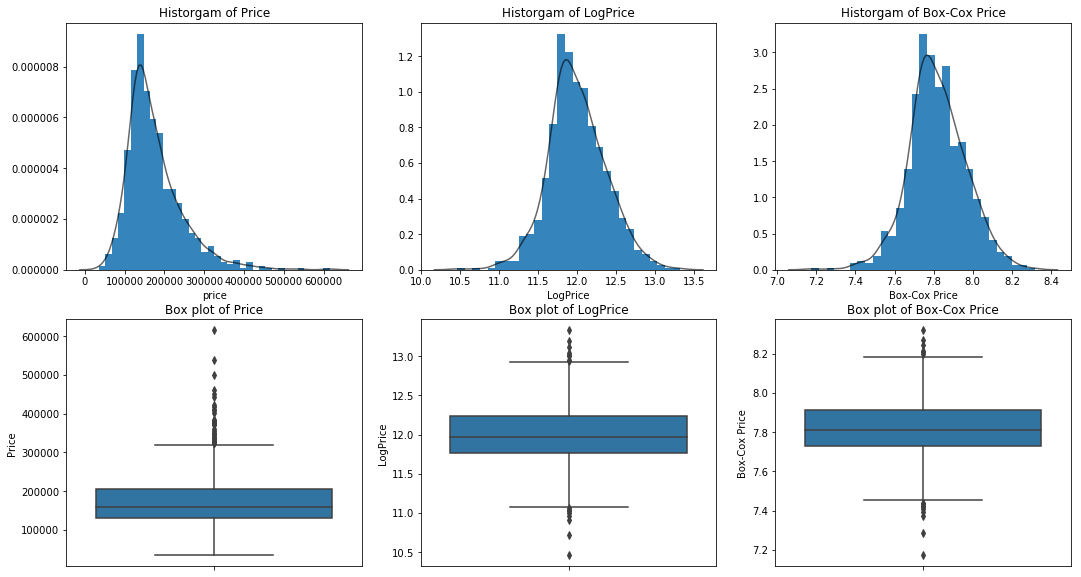

In [169]:
# plot the distribution and the box plot of the responses 

fig, ax= plt.subplots(2,3, figsize=(18,10))
sns.distplot(train['SalePrice'], ax=ax[0,0], kde=True,hist_kws={'alpha': 0.9}, kde_kws={'color': 'black', 'alpha': 0.6})
ax[0,0].set(title='Historgam of Price', xlabel='price')
sns.boxplot(train['SalePrice'], data=train, orient='v', ax=ax[1,0])
ax[1,0].set(title='Box plot of Price', ylabel='Price')

sns.distplot(train['LogPrice'], ax=ax[0,1], kde=True,hist_kws={'alpha': 0.9}, kde_kws={'color': 'black', 'alpha': 0.6})
ax[0,1].set(title='Historgam of LogPrice', xlabel='LogPrice')
sns.boxplot(train['LogPrice'], data=train, orient='v', ax=ax[1,1])
ax[1,1].set(title='Box plot of LogPrice', ylabel='LogPrice')

sns.distplot(train['BoxCoxPrice'], ax=ax[0,2], kde=True,hist_kws={'alpha': 0.9}, kde_kws={'color': 'black', 'alpha': 0.6})
ax[0,2].set(title='Historgam of Box-Cox Price', xlabel='Box-Cox Price')
sns.boxplot(train['BoxCoxPrice'], data=train, orient='v', ax=ax[1,2])
ax[1,2].set(title='Box plot of Box-Cox Price', ylabel='Box-Cox Price')

plt.show()
fig.savefig("1.1.png",format="png",dpi=250) 

In [170]:
table1_1=train[prices].describe().round(5)
table1_1.loc['Skew', :]=train[prices].skew() 
table1_1.loc['Kurt', :]=train[prices].kurt() 
table1_1.to_csv("table1_1.csv")
table1_1.round(5)

,SalePrice,LogPrice,BoxCoxPrice
count,804.00000,804.00000,804.00000
mean,175324.46642,12.00440,7.81871
std,70035.48520,0.37066,0.14638
min,35000.00000,10.46310,7.17384
25%,129500.00000,11.77144,7.72789
50%,158725.00000,11.97493,7.80914
75%,206225.00000,12.23672,7.91180
max,615000.00000,13.32938,8.31855
Skew,1.58138,0.10948,-0.00702
Kurt,4.27673,0.69715,0.77309


## Part II: Exploratory analysis between predictors and response

###As the there are too many predictors (78), and may be only 1/8 will be used in model. so I begin with the highest corr for EDA.


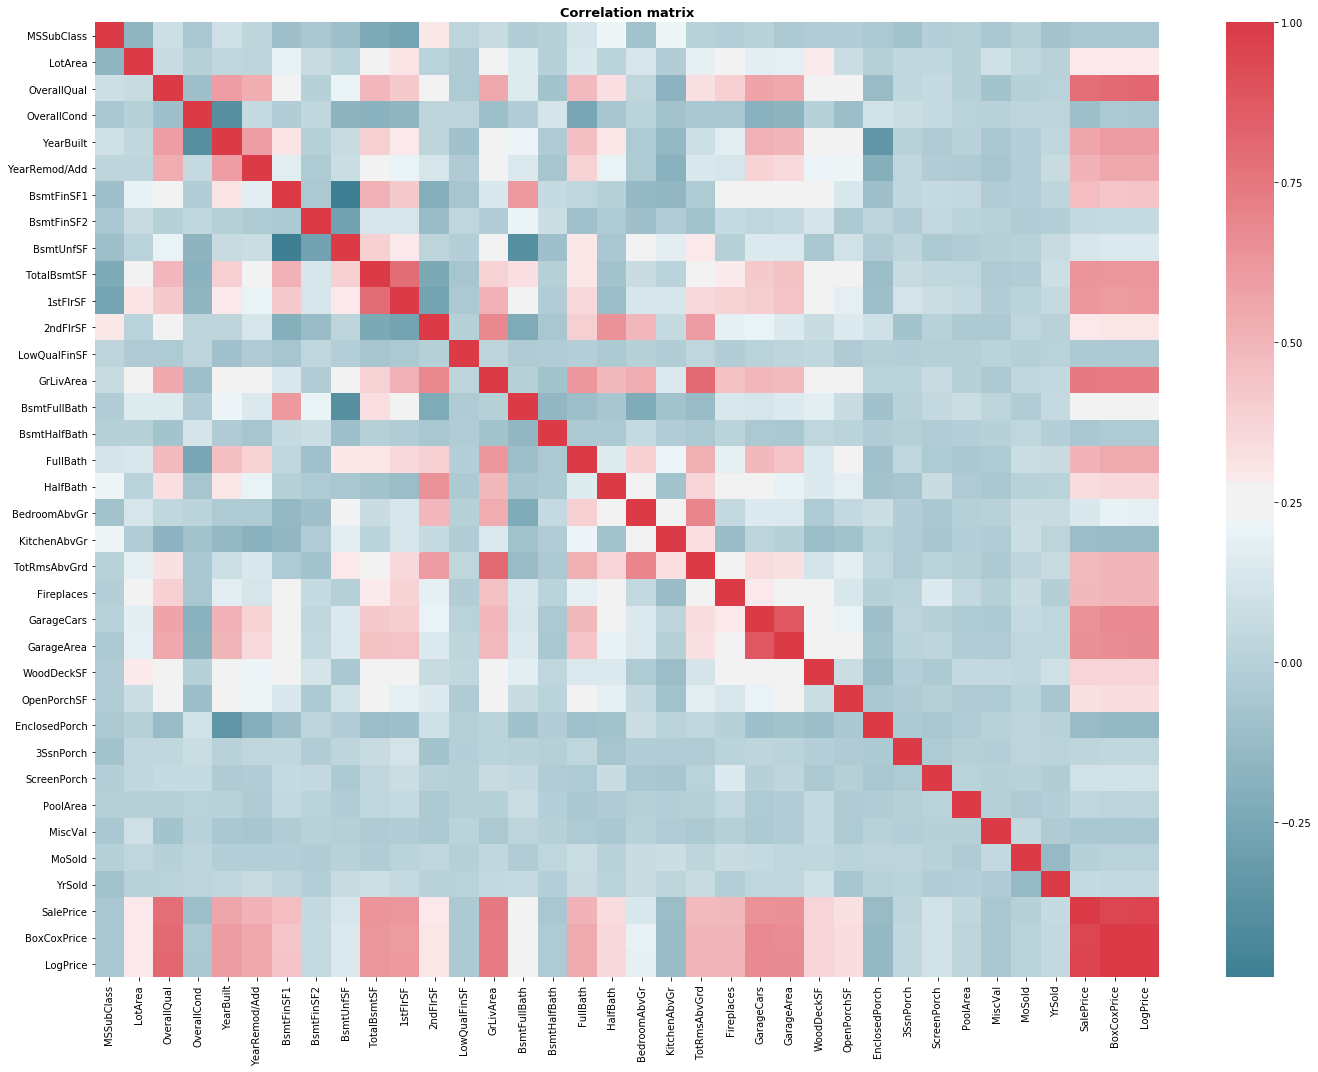

In [171]:
# correlation matrix for all variables 
# find useful predictors.
train.corr().round(2)
fig, ax = plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train.corr(), ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show()
fig.savefig("1.7.png",format="png",dpi=250) 

In [172]:
# potential high corr variables should be found and might be removed.

correlation=train.corr()
print(len(correlation['SalePrice'])) #no object included  

high_corr=[]
print('corr >=0.5 :')
for i in continuous_predictors:
    if correlation['SalePrice'][i]>=0.3:
        high_corr.append(i) 
print(high_corr)
print("------------------------")
print("corr<=0.5 :")
for i in continuous_predictors:
    if correlation['SalePrice'][i]<=-0.3:
        print(i)
    else: 
        print('no predictor')
        break

36
corr >=0.5 :
['OverallQual', 'YearBuilt', 'YearRemod/Add', '1stFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
------------------------
corr<=0.5 :
no predictor


In [173]:
# Check VIF
# the method below is wrong, i donot know why , but based on corr matrix, seems no corr >0.9. 
# therefore, i will check these 11 variables first in EDA.



for i in high_corr: 
    for j in high_corr:
        if correlation[i][i]>=0.9:   
            print(i,j)

OverallQual OverallQual
OverallQual YearBuilt
OverallQual YearRemod/Add
OverallQual 1stFlrSF
OverallQual GrLivArea
OverallQual FullBath
OverallQual HalfBath
OverallQual TotRmsAbvGrd
OverallQual Fireplaces
OverallQual WoodDeckSF
OverallQual OpenPorchSF
OverallQual SalePrice
YearBuilt OverallQual
YearBuilt YearBuilt
YearBuilt YearRemod/Add
YearBuilt 1stFlrSF
YearBuilt GrLivArea
YearBuilt FullBath
YearBuilt HalfBath
YearBuilt TotRmsAbvGrd
YearBuilt Fireplaces
YearBuilt WoodDeckSF
YearBuilt OpenPorchSF
YearBuilt SalePrice
YearRemod/Add OverallQual
YearRemod/Add YearBuilt
YearRemod/Add YearRemod/Add
YearRemod/Add 1stFlrSF
YearRemod/Add GrLivArea
YearRemod/Add FullBath
YearRemod/Add HalfBath
YearRemod/Add TotRmsAbvGrd
YearRemod/Add Fireplaces
YearRemod/Add WoodDeckSF
YearRemod/Add OpenPorchSF
YearRemod/Add SalePrice
1stFlrSF OverallQual
1stFlrSF YearBuilt
1stFlrSF YearRemod/Add
1stFlrSF 1stFlrSF
1stFlrSF GrLivArea
1stFlrSF FullBath
1stFlrSF HalfBath
1stFlrSF TotRmsAbvGrd
1stFlrSF Fireplaces


# Continuous variables : high corr with SalesPrice
## OverallQual
### corr with SalesPrice is close to 0.8. 

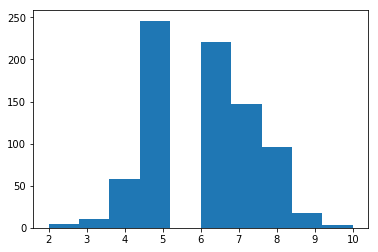

In [175]:
# this is Ordinal , but trade as continuous could be reasonable ..  ?????????
# why loss at meddle?

plt.hist(train['OverallQual'])
plt.show() 

In [176]:
count_o=train.groupby("OverallQual").count()
print(count_o.loc[:,'SalePrice'])  # no drop for continuous?????????

OverallQual
2       4
3      11
4      58
5     246
6     221
7     147
8      96
9      18
10      3
Name: SalePrice, dtype: int64


In [ ]:
# EDA for OverallQual
## maybe just add one knot

fig, ax= plt.subplots(2,3, figsize=(20,10))

sns.regplot(train['OverallQual'], train['SalePrice'], ax=ax[0,0],ci=True, lowess=True, scatter_kws={'alpha':0.6})
ax[0,0].set(title='OverallQual VS Price without restriction',xlabel='OverallQual')

sns.regplot(train['OverallQual'], train['LogPrice'], ax=ax[0,1],ci=True, lowess=True,scatter_kws={'alpha':0.6})
ax[0,1].set(title='OverallQual VS LogPrice without restriction',xlabel='OverallQual')

sns.regplot(train['OverallQual'], train['BoxCoxPrice'], ax=ax[0,2], ci=True,lowess=True,scatter_kws={'alpha':0.6})
ax[0,2].set(title='OverallQual VS BoxCoxPrice without restriction',xlabel='OverallQual')
ax[0,2].set_ylim(1.2,1.8)

sns.regplot(train['OverallQual'], train['SalePrice'], ax=ax[1,0],ci=True, scatter_kws={'alpha':0.6})
ax[1,0].set(title='OverallQual VS Price restricted to linear model',xlabel='OverallQualOverallQual')

sns.regplot(train['OverallQual'], train['LogPrice'], ax=ax[1,1],ci=True, scatter_kws={'alpha':0.6})
ax[1,1].set(title='OverallQual VS LogPrice restricted to linear model',xlabel='OverallQual')

sns.regplot(train['OverallQual'], train['BoxCoxPrice'], ax=ax[1,2], ci=True,scatter_kws={'alpha':0.6})
ax[1,2].set(title='OverallQual VS BoxCoxPrice restricted to linear model',xlabel='OverallQual')
ax[1,2].set_ylim(1.2,1.8)

plt.show()
fig.savefig("1.10_1.png",format="png",dpi=250) 

In [ ]:
# EDA for the nonlinear approximation of OverallQuat 

# a nonparametric (model free) estimate of the relationship between the lot and the residuals

formula1_1='LogPrice ~ OverallQual'
reg1_1 = smf.ols(formula=formula1_1, data=train).fit()
residuals1_1=reg1_1.resid

fig, ax= plt.subplots()
sns.regplot(train['OverallQual'], residuals1_1, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('OverallQual',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('OverallQual against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.show()

In [ ]:
# nonlinearity formulation for lot with 1 knot

xi1_1=train['OverallQual'].median()
train['Step1_1']=(train['OverallQual']>xi1_1)*(train['OverallQual']-xi1_1)

formula1_2='LogPrice ~ OverallQual + Step1_1'
reg1_2 = smf.ols(formula=formula1_2, data=train).fit()
print(reg1_2.summary())

In [ ]:
# plot 1 for the reg1_2

fig, ax= plt.subplots()
sns.regplot(train['OverallQual'], train['LogPrice'], ci=None, fit_reg=False, scatter_kws={'s': 35, 'alpha': 0.6})

a=train['OverallQual'].min()
b=train['OverallQual'].max()+0.1
x=np.linspace(a, b)

y=reg1_2.predict({'OverallQual': x, 'Step1_1': (x-xi1_1)*((x>xi1_1).astype(int))})
ax.plot(x, y, color='Black')

ax.set_xlabel('OverallQual')
ax.set_ylabel('LogPrice')
ax.set_title('Linear spline (1 knot) for OverallQual and LogPrice')

sns.despine()
plt.show()

In [ ]:
formula1_2='LogPrice ~ OverallQual + Step1_1'
reg1_2 = smf.ols(formula=formula1_2, data=train).fit()
residuals1_2=reg1_2.resid

fig, ax= plt.subplots()
sns.regplot(train['OverallQual'], residuals1_2, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('OverallQual',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('OverallQual (1 knot) against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.show()

## MZ Zoning Code

RL - 0 - Residential Low Density

FV - 1 - Floating Village Residential
 
RM - 2 - Residential Medium Density

In [ ]:
count2=train.groupby("MSZoning").count()
print(count2.loc[:,'SalePrice'])

In [ ]:
rows=(train['MSZoning']<'4')
sns.boxplot(x=train.loc[rows,'MSZoning'], y=train.loc[rows,'SalePrice'], palette='Blues')
plt.show() 

In [ ]:
rows=(train['MSZoning']<'4')
sns.boxplot(x=train.loc[rows,'MSZoning'], y=train.loc[rows,'LogPrice'], palette='Blues')
plt.show()

### It is apparent that there are nonlinear relationships between  price and the medians of  MSZoning based on above figure . And the outliers are significant, especially when the number of MSZoning=0 and 2.

In [ ]:
# PoolQC  
# Fence
# MiscFeature
## Chris: These are ordinal variables

### Interesting to note that PoolQC only have 3 data points that are off a different value

In [ ]:
df = pd.DataFrame({'PoolQC':list(train['PoolQC'])})
pd.get_dummies(df).head()

### Only 3 values with pool variables, we can just drop this

In [ ]:
del train['PoolQC']
del train['PoolArea']
del test['PoolQC']
del test['PoolArea']

In [ ]:
df = pd.DataFrame({'Fence':list(train['Fence'])})
pd.get_dummies(df).head()
#Here, the base case Fence means the house does not have a 

23 places have a feature out of 805 observations. Is it worthwhile to even include? Only 2% of observations have this

Therefore, I decided to remove it.

In [ ]:
del train['MiscFeature']
del test['MiscFeature']

In [ ]:
train.head()